In [10]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [17]:
# Read data

folder_fields = "/home/anais/Alexandre/data/Calibration_top_grey/muDIC"

frames_true = np.load(os.path.join(folder_fields, "frames.npy"))
coords = np.load(os.path.join(folder_fields, "coords.npy"))
strain = np.load(os.path.join(folder_fields, "true_strain.npy"))

with open(os.path.join(folder_fields, 'params.txt')) as file:
    params = file.read()

In [18]:
# Data shape

print(f"Frames computed: {frames_true.tolist()}")
print(f"Coords of shape {coords.shape} -> (useless, x or y, x_elem, y_elem, frame)")
print(f"Strain of shape {strain.shape} -> (useless, ?, ?, x_elem, y_elem, frame)")

Frames computed: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695]
Coords of shape (1, 2, 50, 40, 140) -> (useless, x or y, x_elem, y_elem, frame)
Strain of shape (1, 2, 2, 50, 40, 140) -> (useless, ?, ?, x_elem, y_elem, frame)


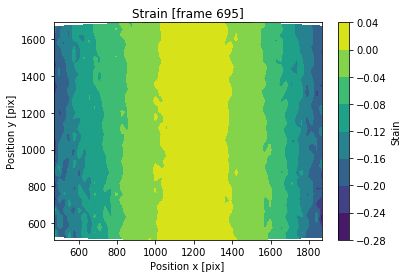

In [19]:
# Plot one frame

frame = -1
frame_true = frames_true[frame]

x = coords[0,0,:,:,frame]
y = coords[0,1,:,:,frame]

strain_toPlot = strain[0,0,0,:,:,frame]

fig, ax = plt.subplots()
ax.set_title(f"Strain [frame {frame_true}]")

im = ax.contourf(x, y, strain_toPlot)
fig.colorbar(im, ax=ax, label="Stain")

ax.set_xlabel('Position x [pix]')
ax.set_ylabel('Position y [pix]')

plt.show()

140 frames


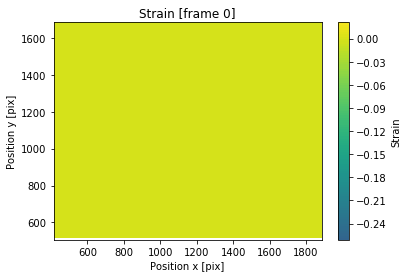

In [20]:
# Plot animation

nbFrames = coords.shape[-1]
frame_start = -1

fig, ax = plt.subplots()

# Set labels
ax.set_title(f"Strain [frame {frames_true[frame_start]}]")
ax.set_xlabel('Position x [pix]')
ax.set_ylabel('Position y [pix]')

# Set bounds
xbounds = coords[0,0,:,0,:].min(), coords[0,0,:,0,:].max()
ybounds = coords[0,1,:,0,:].min(), coords[0,1,0,:,:].max()
ax.set_xbound(*xbounds)
ax.set_ybound(*ybounds)

# Set static cmap
vmin, vmax = strain[0,0,0,:,:,1:].min(), strain[0,0,0,:,:,1:].max()
norm = plt.Normalize(vmin, vmax)
cmap = plt.get_cmap('viridis')
n_levels = 100

# Plot last frame
x = coords[0,0,:,:,frame_start]
y = coords[0,1,:,:,frame_start]
strain_toPlot = strain[0,0,0,:,:,frame_start]

cont = ax.contourf(x, y, strain_toPlot, levels=n_levels, cmap=cmap, norm=norm)
fig.colorbar(cont, ax=ax, label="Strain")


def update(frame):
    global cont

    x = coords[0,0,:,:,frame]
    y = coords[0,1,:,:,frame]
    strain_toPlot = strain[0,0,0,:,:,frame]
    
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact

    cont = plt.contourf(x, y, strain_toPlot, levels=n_levels, cmap=cmap, norm=norm)

    # Set limits and title
    ax.set_title(f"Strain [frame {frames_true[frame]}]")
    ax.set_xbound(*xbounds)
    ax.set_ybound(*ybounds)
    
    return cont

anim = animation.FuncAnimation(fig, update, frames=nbFrames, repeat=False, interval=100)
anim_html = HTML(anim.to_html5_video())

print(f"{nbFrames} frames")


Question: Why is the x extend changing ??

In [21]:
# Display animation

print(type(anim_html))
anim_html

<class 'IPython.core.display.HTML'>


In [22]:
# Save animation

savepath = os.path.join(folder_fields, "animation_strain.html")
with open(savepath, 'w') as f:
    f.write(anim_html.data)